# Metrolytics Word Vectors
In this notebook we'll create embeddings for words in our corpus, and look for interesting phenomena.

In [1]:
import pandas as pd
import gensim

import matplotlib.pyplot as plt
%matplotlib inline
 
# from collections import Counter

In [2]:
df = pd.read_parquet('lyrics.parquet')

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

=====================  
First, let's create a function for processing the tesxt. We will test this function on a song, as an example.

Finally, let's train word vectors on our new corpus. 

In [3]:
w2v = gensim.models.Word2Vec(df.sent.str.split(), sg=1, min_count=20, size=300, window=3, workers=7)
w2v.init_sims(replace=True) # frees memory of word vectors but prevents further training

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [4]:
def evaluate_words(words_to_check = ['love', 'hate', 'lonely', 'heartache', 'success', 'guitar', 'god', 'beer', 'gun', 'police']):
    for word in words_to_check:
        print(word, ' -> ')
        print('\n'.join(['\t{} ({:.2f}), '.format(tup[0], tup[1]) for tup in w2v.wv.similar_by_word(word, topn=5)]))
        print()

In [5]:
evaluate_words()

love  -> 
	unconditionally (0.59), 
	mistreat (0.58), 
	madly (0.56), 
	boardwalk (0.55), 
	unconditional (0.54), 

hate  -> 
	retaliate (0.49), 
	underdog (0.49), 
	conquers (0.48), 
	hatred (0.48), 
	comments (0.48), 

lonely  -> 
	brokenhearted (0.60), 
	longin (0.51), 
	lonesome (0.51), 
	alone (0.50), 
	loneliest (0.50), 

heartache  -> 
	heartaches (0.54), 
	grievin (0.54), 
	doggone (0.52), 
	heartland (0.50), 
	brokenhearted (0.50), 

success  -> 
	accomplish (0.55), 
	impressed (0.53), 
	priority (0.53), 
	interests (0.53), 
	occur (0.53), 

guitar  -> 
	violin (0.60), 
	fiddle (0.59), 
	strum (0.58), 
	acoustic (0.58), 
	haggard (0.58), 

god  -> 
	forgives (0.56), 
	lord (0.50), 
	unworthy (0.48), 
	righteousness (0.48), 
	redeemer (0.48), 

beer  -> 
	scotch (0.61), 
	keg (0.54), 
	bourbon (0.53), 
	beers (0.52), 
	pitcher (0.49), 

gun  -> 
	guns (0.53), 
	badge (0.52), 
	pistol (0.51), 
	gat (0.49), 
	glock (0.48), 

police  -> 
	cops (0.60), 
	feds (0.52), 
	coppers (0.5

Now let's try with a smaller dimension of vectors (50):

In [6]:
w2v = gensim.models.Word2Vec(df.sent.str.split(), sg=1, min_count=20, size=50, window=2, workers=7)
evaluate_words()

love  -> 
	unconditional (0.84), 
	unconditionally (0.81), 
	mistreat (0.81), 
	dangerously (0.80), 
	thrilled (0.78), 

hate  -> 
	terrorize (0.75), 
	retaliate (0.74), 
	jealousy (0.74), 
	limitations (0.74), 
	addictive (0.73), 

lonely  -> 
	brokenhearted (0.83), 
	alone (0.82), 
	lonesome (0.81), 
	heartbroken (0.81), 
	loneliest (0.77), 

heartache  -> 
	doggone (0.75), 
	heartaches (0.74), 
	sorrow (0.74), 
	lowdown (0.73), 
	heartbreak (0.73), 

success  -> 
	accomplish (0.80), 
	expense (0.78), 
	institution (0.78), 
	wealth (0.78), 
	concern (0.78), 

guitar  -> 
	piano (0.82), 
	strum (0.81), 
	jukebox (0.81), 
	fiddle (0.80), 
	harmonica (0.80), 

god  -> 
	lord (0.86), 
	forgives (0.82), 
	thanking (0.77), 
	pleas (0.76), 
	prays (0.76), 

beer  -> 
	scotch (0.80), 
	keg (0.79), 
	bourbon (0.78), 
	brew (0.78), 
	gin (0.77), 

gun  -> 
	gat (0.83), 
	glock (0.81), 
	pistol (0.80), 
	badge (0.77), 
	bullet (0.77), 

police  -> 
	cops (0.87), 
	feds (0.80), 
	landlord (0.75)

In [65]:
w2v = gensim.models.Word2Vec(df.sent.str.split(), sg=1, min_count=20, size=300, window=7, workers=7)
evaluate_words()

love  -> 
	unloved (0.52), 
	mistreat (0.52), 
	unconditionally (0.51), 
	gladness (0.51), 
	faithfully (0.51), 

hate  -> 
	conquers (0.48), 
	resent (0.47), 
	debate (0.46), 
	hatred (0.46), 
	successful (0.46), 

lonely  -> 
	brokenhearted (0.58), 
	lowdown (0.54), 
	longin (0.53), 
	lonesome (0.51), 
	unloved (0.51), 

heartache  -> 
	brokenhearted (0.48), 
	outgrow (0.46), 
	heartaches (0.45), 
	tomorrows (0.45), 
	mend (0.43), 

success  -> 
	economic (0.47), 
	impressed (0.47), 
	excel (0.46), 
	students (0.45), 
	invest (0.45), 

guitar  -> 
	harmonica (0.62), 
	zappa (0.60), 
	acoustic (0.57), 
	keyboards (0.57), 
	saxophone (0.57), 

god  -> 
	lord (0.56), 
	righteousness (0.54), 
	forgives (0.53), 
	bless (0.52), 
	preached (0.51), 

beer  -> 
	beers (0.56), 
	keg (0.50), 
	scotch (0.50), 
	bourbon (0.48), 
	booze (0.47), 

gun  -> 
	guns (0.55), 
	pistol (0.52), 
	badge (0.50), 
	cocked (0.49), 
	aimed (0.49), 

police  -> 
	cops (0.54), 
	coppers (0.53), 
	harass (0.50), 


### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [8]:
model = w2v

In [9]:
word_combinations_to_try = [
    ['woman', 'king', 'man'], 
    ['girl', 'brother', 'boy'],
    ['man', 'daughter', 'woman'],
    ['mother', 'he', 'father'],
    ['strong', 'small', 'weak'] 
]

for word_combination in word_combinations_to_try:
    print(word_combination)
    print( model.wv.most_similar_cosmul(positive=word_combination[:2], negative=word_combination[2:])[0] )
    print( model.wv.most_similar(positive=word_combination[:2], negative=word_combination[2:])[0] )
    print()

['woman', 'king', 'man']
('queen', 0.9132322669029236)
('queen', 0.693677544593811)

['girl', 'brother', 'boy']
('sister', 0.9256507754325867)
('sister', 0.7619000673294067)

['man', 'daughter', 'woman']
('cousin', 0.9443888664245605)
('cousin', 0.6846567392349243)

['mother', 'he', 'father']
('she', 0.8988032937049866)
('she', 0.7440416812896729)

['strong', 'small', 'weak']
('big', 0.9908525943756104)
('big', 0.6973406076431274)



## Frequent Words

In [21]:
!pip install tqdm

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
from tqdm import tqdm 
from collections import Counter

freqs = {}
for i,r in tqdm(df.iterrows()):
    if r.genre not in freqs:
        freqs[ r.genre ] = Counter()
    freqs[ r.genre ].update(r.sent.split())

49976it [00:07, 6974.08it/s]


In [29]:
freqs_bg = Counter()
[freqs_bg.update(v) for v in freqs.values()];

Let's check the most common words for each genre. Remember, here we only consider word occurrences. A word might be common in all genres. We will later examine words that are common in a specific genre more than the others.

In [30]:
freqs_bg.most_common(20)

[('i', 539569),
 ('and', 95043),
 ('you', 78251),
 ('like', 74491),
 ('know', 64923),
 ('got', 63800),
 ('love', 61436),
 ('get', 53567),
 ('the', 47974),
 ('na', 44756),
 ('oh', 42384),
 ('one', 40290),
 ('go', 38881),
 ('but', 38732),
 ('see', 38501),
 ('it', 37839),
 ('time', 37212),
 ('let', 35789),
 ('never', 35353),
 ('cause', 33196)]

In [31]:
_ = {genre: [v[0] for v in counts.most_common(20)] for genre, counts in freqs.items()}
pd.DataFrame(_)

,Pop,Hip-Hop,Rock,Country,Metal
0,i,i,i,i,i
1,love,like,and,and,the
2,and,got,you,love,and
3,you,get,know,you,you
4,oh,and,love,but,life
5,know,know,like,like,one
6,na,you,the,know,time
7,like,nigga,got,got,a
8,got,na,oh,one,see
9,baby,cause,na,time,like


Can you spot the genre with the least amount of "love"?

To find the most common words for each genre, we will search for words that are both common and have a large ratio between their relative frequency in a genre and their relative frequency in the background.


Let's find the most common and rare words. We can count each genre separately, and then easily combine the counts to get the backgroun distribution. We need to remember that the number of songs in each genre is different.

In [32]:
total_counts = {genre: sum(counts.values()) for genre, counts in freqs.items()}
total_counts

{'Pop': 1756442,
 'Hip-Hop': 3167145,
 'Rock': 1430304,
 'Country': 945064,
 'Metal': 1085849}

In [33]:
total_counts_bg = sum(freqs_bg.values())
word_freq = pd.DataFrame({w: freqs_bg[w] / total_counts_bg for w, v in freqs_bg.most_common(2000)}, index=['bg']).T
word_freq.head()

,bg
i,0.064351
and,0.011335
you,0.009332
like,0.008884
know,0.007743


In [34]:
for genre in total_counts.keys():
    word_freq[genre] = [ freqs[genre].get(w, 0)/total_counts[genre]/r['bg'] for w,r in word_freq.iterrows() ]

In [35]:
genres = df.genre.unique()
for genre in genres:
    print( genre )
    print( ", ".join(word_freq.sort_values(genre, ascending=False).index[:50].values ) )
    print()

Pop
amor, io, che, pi, ti, tus, moi, ce, vez, puedo, toi, qui, eres, eh, quiero, non, hoy, tout, et, est, il, ci, comme, sei, per, ser, ni, qu, ba, ahora, voy, mis, tiempo, tu, cuando, siempre, ooh, pas, te, ai, todo, si, je, mundo, ding, por, vida, para, lover, tan

Hip-Hop
dre, yuh, niggas, gangsta, rappers, nigga, niggaz, hoes, motherfuckin, glock, bitches, thugs, thug, killa, yall, homies, pussy, beef, nuh, homie, benz, haters, tha, motherfuckers, squad, pimp, motherfucking, mic, rapper, bitch, rap, dick, hoe, clip, dope, playa, fo, wit, shit, lil, bust, poppin, weed, tryna, mack, hustle, blunt, shorty, crew, ass

Rock
ga, wa, bop, ik, american, wasted, changing, blues, hiding, everyone, anyway, liar, anymore, doo, ooo, does, poison, anyone, waited, mistakes, says, seemed, changes, santa, well, save, underneath, driving, bones, likes, asleep, sleeping, highway, answers, working, counting, wo, turning, began, walks, california, edge, strange, shadow, fading, saved, fine, lonely, did

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

We start by downloading the data and extracting it. We will create a dictionary with the keys are the words and the values are their sentiment scores.  
Note that the sentiment dataset contains terms of multiple words and hashtags - we will remove these from the dataset.

In [10]:
!wget http://saifmohammad.com/WebDocs/lexiconstoreleaseonsclpage/SemEval2015-English-Twitter-Lexicon.zip
!unzip SemEval2015-English-Twitter-Lexicon.zip
!head SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open SemEval2015-English-Twitter-Lexicon.zip, SemEval2015-English-Twitter-Lexicon.zip.zip or SemEval2015-English-Twitter-Lexicon.zip.ZIP.
head: cannot open 'SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt' for reading: No such file or directory


In [37]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open glove.twitter.27B.zip, glove.twitter.27B.zip.zip or glove.twitter.27B.zip.ZIP.


In [48]:
if False:
    # https://radimrehurek.com/gensim/scripts/glove2word2vec.html
    tmp_file = get_tmpfile("w2v.twitter.27B.100d.txt")
    glove2word2vec('glove.twitter.27B.100d.txt', tmp_file)
    w2v_pretrained = KeyedVectors.load_word2vec_format(tmp_file)
else:
    w2v_pretrained = gensim.models.KeyedVectors.load_word2vec_format(r'E:\sharedfolder\data\word_vectors\GoogleNews-vectors-negative300.bin', binary=True)  

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split

with open('data/SemEval2015-English-Twitter-Lexicon.txt', 'r') as f:
    scores, sentiment_words = zip(*[line.strip().split() for line in f.readlines()])

twitter_sentiment_words = [w[1:] if w.startswith('#') else w for w in sentiment_words]
X = []
y = []

for i in range(len(scores)):
    if twitter_sentiment_words[i] in w2v_pretrained:
        X.append(w2v_pretrained[twitter_sentiment_words[i]])
        y.append(scores[i])

X = np.array(X, dtype='float')
y = np.array(y, dtype='float')

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.1, random_state=0) # We used 10,000 songs from each category - 1,000 songs in the test set seem like a lot. 

Next let's build a regressor to predict the sentiment of a word from its word vector. We use the word vectors trained on our corpus of song lyrics.  
Let's try a few different algorithms, and choose the one with the smallest MSE on the test set:

In [52]:
from sklearn import metrics

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = [
    LinearRegression(),
    MLPRegressor(max_iter=1000, tol=1e-5, hidden_layer_sizes=(300,200,100)),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
score = {}
for model in models:
    model_name = str(model).split('(')[0]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score[model_name] = metrics.mean_squared_error(y_test, y_pred)

print(score)

{'LinearRegression': 0.11316787422814172, 'MLPRegressor': 0.08405986940644739, 'RandomForestRegressor': 0.12179120746331178, 'GradientBoostingRegressor': 0.09483046904883626, 'SVR': 0.09441319559993488}


In [53]:
model = models[-1]

Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [54]:
num_words = 0
test_words = []
for w, _ in freqs_bg.most_common(10000):
    if w not in sentiment_words and w in w2v_pretrained:
        test_words.append(w)
        num_words += 1
    if num_words == 1000:
        break

similar_words_features = np.array([w2v_pretrained[w] for w in test_words], 'float')
sentiment_scores = model.predict(similar_words_features)

df_predicted_sentiment = pd.Series(sentiment_scores, index=test_words)

print(' --- top 20 negative sentiment score --')
print( df_predicted_sentiment.sort_values().head(20) )

print()
print(' --- top 20 positive sentiment score --')
print( df_predicted_sentiment.sort_values().tail(20) )

 --- top 20 negative sentiment score --
thug            -0.680940
stupid          -0.637624
thugs           -0.542461
mis             -0.535182
dead            -0.533821
ghetto          -0.516853
drunk           -0.510473
bleed           -0.506762
scared          -0.498976
lying           -0.493144
bullshit        -0.489282
blame           -0.485164
fear            -0.466601
crime           -0.459788
weak            -0.440101
evil            -0.436933
pain            -0.435080
motherfuckers   -0.434349
fools           -0.423998
killing         -0.423875
dtype: float64

 --- top 20 positive sentiment score --
dream       0.431751
together    0.432483
glory       0.438293
shining     0.455213
skies       0.455951
shine       0.476554
grace       0.479141
sun         0.487950
movin       0.490266
pride       0.493117
vision      0.515964
bright      0.523533
warm        0.530904
flowers     0.534220
magic       0.538662
hello       0.542103
hi          0.569705
proud       0.606583
joy   

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [66]:
import itertools
words = list(set(list(itertools.chain.from_iterable([word_freq.sort_values(genre, ascending=False).index[:50].values for genre in genres]))))

In [71]:
from sklearn.manifold import TSNE
X = [w2v[w] for w in words]
X_embedded = TSNE(n_components=2).fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [72]:
X_embedded.shape

(248, 2)

In [73]:
colors = ['r', 'g', 'b', 'k', 'y']
c = [colors[list(genres).index(word_freq.loc[w].argmax())] for w in words]
word_genre = np.array( [word_freq.loc[w].argmax() for w in words] )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


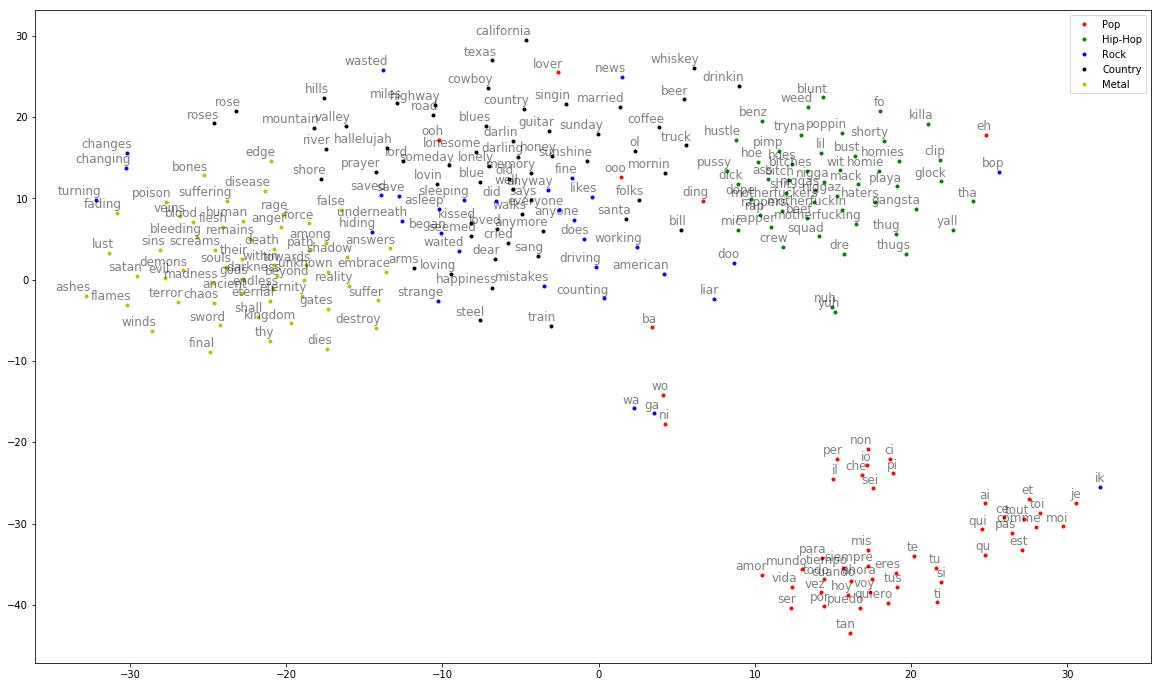

In [74]:
plt.figure(figsize=(20,12))

x = X_embedded[:,0];
y = X_embedded[:,1];

for i,genre in enumerate(genres):
    ids = np.where( word_genre==genre )[0]
    plt.plot(x[ids], y[ids], '.', color=colors[i], label=genre)
for i, word in enumerate(words):
    plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom', size=12)
plt.legend();